In [1]:
from utils import build_block_Sigma, C_from_Sigma, sample_PLN, MSE
import torch
from IMPS_PLN import IMPS_PLN, show, log_likelihood
from fastPLN import fastPLN
import numpy as np
import matplotlib.pyplot as plt


device  cpu
device :  cpu


In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else : 
    device = torch.device('cpu')
print('device ', device)

device  cpu


In [4]:
d = 3
n = 200;  p = 10
q = 10

In [5]:
# 0 est pas mal 
#torch.manual_seed(0)
Sigma_sampling = 1*torch.from_numpy(build_block_Sigma(p,p//4))/1.5 #+ 0.5*torch.eye(p)
true_C = torch.from_numpy(C_from_Sigma(Sigma_sampling, q))
true_Sigma_sampling = true_C@(true_C.T)
true_beta =torch.randn((d, p))/3

covariates = torch.randn((n,d))
O =  0+torch.zeros((n,p))
sample_model = sample_PLN()
Y, Z, _  = sample_model.sample(Sigma_sampling,true_beta, O, covariates)
Y = torch.from_numpy(Y).to(device)
covariates.to(device)
O.to(device)
None

/home/bastien/Documents/These/PLNpy/utils.py:240: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A.transpose(-2, -1).conj()).transpose(-2, -1).conj() (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:1284.)
  chol = torch.cholesky(self.Sigma)


In [9]:
batch_size = 20
IMPS_model = IMPS_PLN(q, nb_average_param = 15, nb_average_likelihood = 6,nb_plateau = 50)
%time IMPS_model.fit(Y,O,covariates,150, acc = 0.006,lr = 0.008,N_iter_mode = 100, lr_mode = 0.3,  class_optimizer = torch.optim.RMSprop, batch_size = batch_size,  VR ='SAGA' )

 73%|███████▎  | 110/150 [00:25<00:09,  4.24it/s]

Algorithm stopped after  110  iterations
CPU times: user 1min 42s, sys: 1.33 s, total: 1min 43s
Wall time: 26.1 s


Log likelihood of the model :  tensor(-19.1567, grad_fn=<MeanBackward0>)


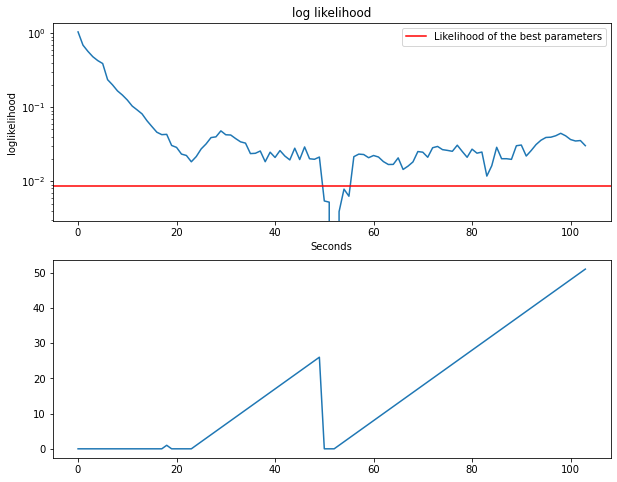

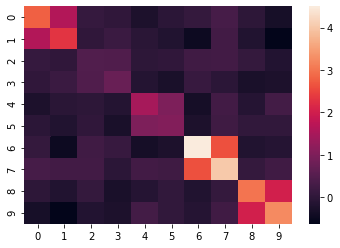

In [8]:
print(IMPS_model)

In [33]:
log_like_IMPS = log_likelihood(Y,O,covariates, IMPS_model.C_mean, IMPS_model.beta_mean, acc = 0.005)
log_like_fast = log_likelihood(Y,O,covariates, fastModel.C, fastModel.beta.detach(), acc = 0.005)

max_like tensor(-19.0917, grad_fn=<MeanBackward0>)
log_like_IMPS tensor(-19.0917, grad_fn=<MeanBackward0>)
tensor(0.1898, grad_fn=<AddBackward0>)


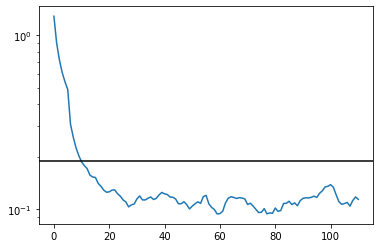

In [34]:
l = IMPS_model.log_likelihood_list
max_like = max(max(np.max(l), log_like_IMPS), log_like_fast)
print('max_like', max_like)
print('log_like_IMPS', log_like_IMPS)

plt.plot(np.arange(0, len(l)), - np.array(l)+ max_like.item())

print(-log_like_fast+ max_like.item())
plt.axhline(-log_like_fast+ max_like.item(), c = 'black')
plt.axhline(-log_like_IMPS+ max_like.item(), c = 'red')
plt.yscale('log')

In [6]:
fastModel = fastPLN()
fastModel.fit(Y,O,covariates, 50)

### Log likelihood with the IMPS algorithm

In [ ]:
log_like_IMPS = log_likelihood(Y,O,covariates, model.C_mean, model.beta_mean, acc = 0.0001)
print('log_like IMPS', log_like_IMPS)

### Log likelihood with the variational algorithm

In [7]:
#with torch.no_grad(): 
fastModel.C = torch.from_numpy(C_from_Sigma(fastModel.Sigma.detach(), q)).detach()

In [57]:
log_like_fast = log_likelihood(Y,O,covariates, fastModel.C, fastModel.beta.detach())

print('log_like fast', log_like_fast)

log_like fast tensor(-20.3751, grad_fn=<MeanBackward0>)


In [ ]:
print(model)

Log likelihood of the model :  tensor(-19.8940, grad_fn=<MeanBackward0>)


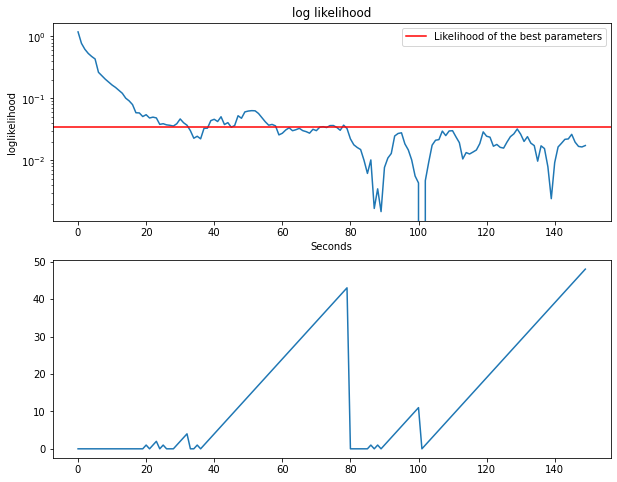

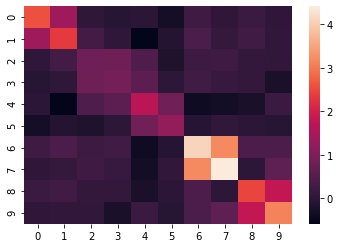

In [9]:
print(model)

In [12]:
print(MSE(model.beta_mean-true_beta))
print(MSE(model.Sigma()- true_Sigma_sampling))
print(MSE((model.C@model.C.T)-true_Sigma_sampling))

tensor(0.0143)
tensor(0.0793)
tensor(0.0799, grad_fn=<MeanBackward0>)


In [9]:
print(MSE(model.beta_mean-true_beta))
print(MSE(model.Sigma()- true_Sigma_sampling))
print(MSE((model.C@model.C.T)-true_Sigma_sampling))


tensor(0.0146)
tensor(0.0757)
tensor(0.0772, grad_fn=<MeanBackward0>)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


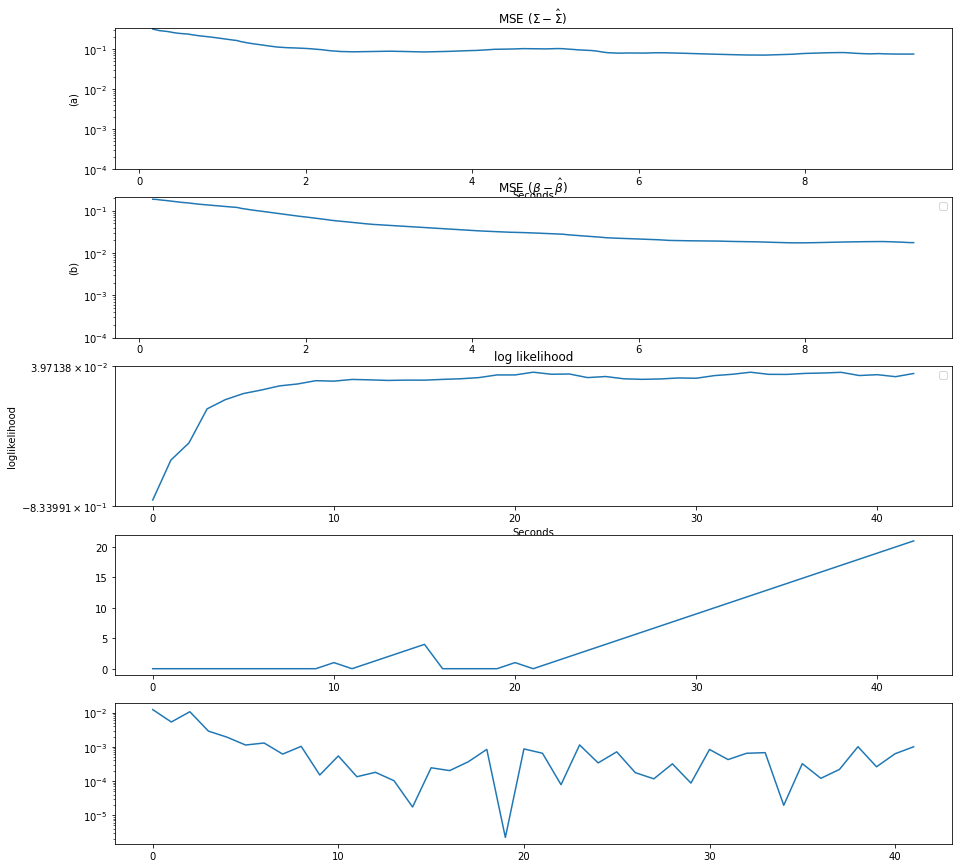

In [26]:
# model.fitted = True
show(model)

In [27]:
MSE(model.Sigma()-true_Sigma_sampling)

tensor(0.0734)

In [28]:
MSE(model.beta_mean-true_beta)

tensor(0.0176)

In [21]:
MSE(model.Sigma()-true_Sigma_sampling)

tensor(0.0085)

In [22]:
MSE(model.beta_mean-true_beta)

tensor(0.0022)

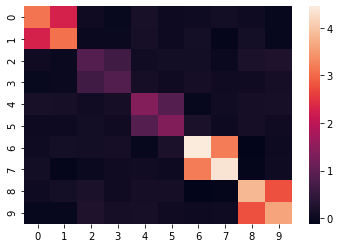

In [100]:
model.show_Sigma()

<AxesSubplot:>

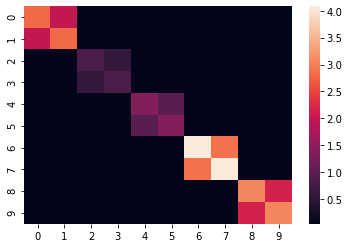

In [101]:
sns.heatmap(true_Sigma_sampling)

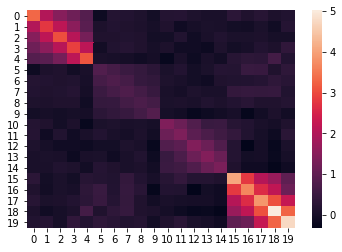

In [115]:
model.show_Sigma()

In [95]:
from fastPLN import fastPLN
fastmodel = fastPLN()
fastmodel.fit(Y,O,covariates, 150)
print('MSE Sigma', torch.mean((fastmodel.Sigma-Sigma_sampling)**2))
print('MSE beta', torch.mean((fastmodel.beta-true_beta)**2))

MSE Sigma tensor(0.0237, grad_fn=<MeanBackward0>)
MSE beta tensor(0.0013, grad_fn=<MeanBackward0>)
